In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
df = pd.read_excel('startup-expansion.xlsx')


In [7]:
df


,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [10]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Store ID,150.0,75.500000,43.445368,1.0,38.25,75.5,112.75,150.0
Marketing Spend,150.0,2893.146667,367.862817,1811.0,2662.25,2898.0,3111.50,3984.0
Revenue,150.0,39301.433333,15465.753977,15562.0,21113.50,42993.0,51145.50,68828.0


# Preprocessing Data


In [12]:
df.head()


,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887


In [13]:
df.isna().sum()


Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

### no missing data


In [14]:
df['City'].value_counts()

Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: City, Length: 149, dtype: int64

In [15]:
df[df['City'] == 'Rochester']


,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
9,10,Rochester,New York,Region 1,Old,2984,64906
124,125,Rochester,Minnesota,Region 1,Old,2854,18099


### no duplicate records


# EDA


In [65]:
df.head()


,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887


In [68]:
df['Profit'] = df['Revenue'] - df['Marketing Spend']


### ROMS = Return On Marketing Spend


In [85]:
df['ROMS'] = round((df['Profit'] / df['Marketing Spend']) * 100, 2)


In [88]:
df['ROMS%'] = df['ROMS'] / 100


### If ROMS% is = 17 --> For every 1$ I spend it I get 17$


In [89]:
df.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738


In [59]:
# df.drop('Store ID' , axis = 1 , inplace=True)

### 1)Store ID


### what store is the best profit ?


In [74]:
df.sort_values(by='Profit', ascending=False)


,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828,66388
31,32,Grand Rapids,Michigan,Region 1,Old,2808,65475,62667
37,38,Oxnard,California,Region 2,Old,2318,64302,61984
9,10,Rochester,New York,Region 1,Old,2984,64906,61922
17,18,Fontana,California,Region 2,Old,3085,63027,59942
...,...,...,...,...,...,...,...,...
15,16,Temecula,California,Region 2,Old,2795,16690,13895
58,59,Ventura,California,Region 2,Old,3228,16652,13424
42,43,Lewisville,Texas,Region 2,Old,2607,16029,13422
96,97,Wichita Falls,Texas,Region 2,Old,2846,15735,12889


### Store 64 is the best profit


### 2)City


In [75]:
df['City'].value_counts()

Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: City, Length: 149, dtype: int64

### what are the top 10 cities in profit


In [97]:
best_city = df.groupby('City')['Profit'].sum(
).sort_values(ascending=False).head(10)


In [161]:
best_city

City
Rochester        77167
Little Rock      66388
Grand Rapids     62667
Oxnard           61984
Fontana          59942
Brownsville      59473
Providence       59146
Birmingham       57228
Worcester        57165
Overland Park    57018
Name: Profit, dtype: int64

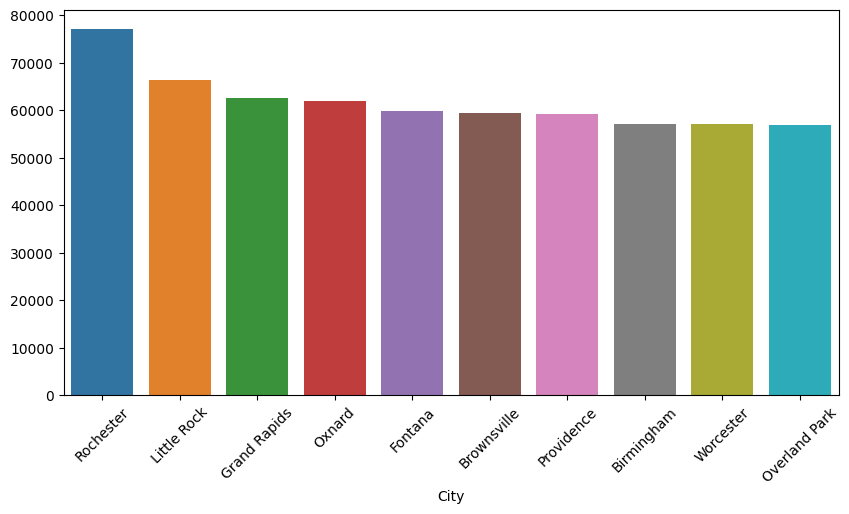

In [96]:
plt.figure(figsize=(10, 5))
sns.barplot(x=best_city.index, y=best_city.values)
plt.xticks(rotation=45)
plt.show()

### Is Rochester in region 1 or 2 ?


In [98]:
df[df['City'] == 'Rochester']

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
9,10,Rochester,New York,Region 1,Old,2984,64906,61922,2075.13,20.7513
124,125,Rochester,Minnesota,Region 1,Old,2854,18099,15245,534.16,5.3416


## 3)State


In [99]:
sc = df['State'].value_counts().head(10)


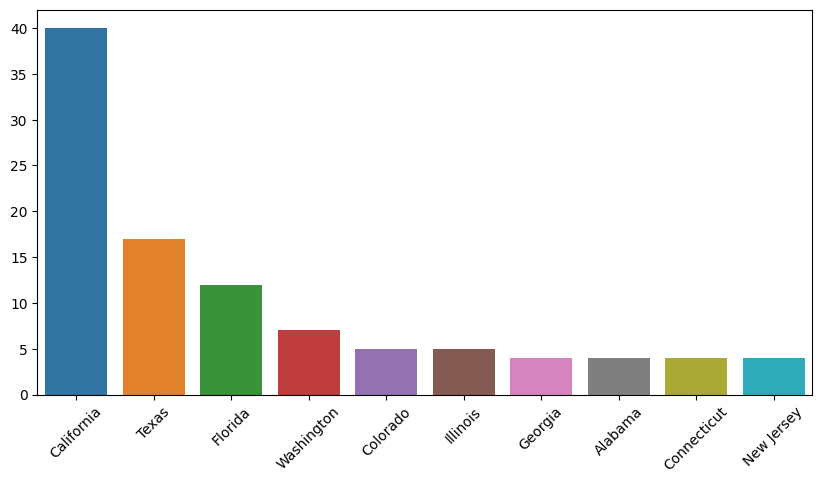

In [100]:
plt.figure(figsize=(10, 5))
sns.barplot(x=sc.index, y=sc.values)
plt.xticks(rotation=45)
plt.show()

### California is the top state counting startups

### Let's see if California is also top in Profit


In [106]:
top_state = df.groupby('State').sum()['Profit'].sort_values(
    ascending=False).reset_index().head(10)


C:\Users\xobed\AppData\Local\Temp\ipykernel_8104\2385299752.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_state = df.groupby('State').sum()['Profit'].sort_values( ascending=False).reset_index().head(10)


In [107]:
top_state

,State,Profit
0,California,1390222
1,Texas,589623
2,Florida,443549
3,Washington,278045
4,Alabama,208455
5,Illinois,186549
6,New York,151609
7,Georgia,147316
8,Connecticut,146142
9,Tennessee,142956


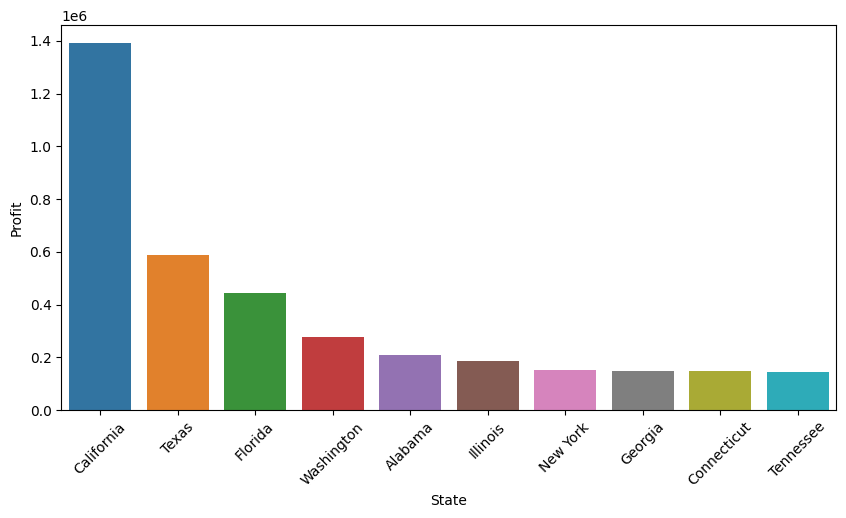

In [109]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_state['State'], y=top_state['Profit'])
plt.xticks(rotation=45)
plt.show()

### Yes California is also the top in Profit


## 4)Sales Region


In [111]:
df.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738


### What is the percentage of stores in each region?


In [114]:
re = df['Sales Region'].value_counts()

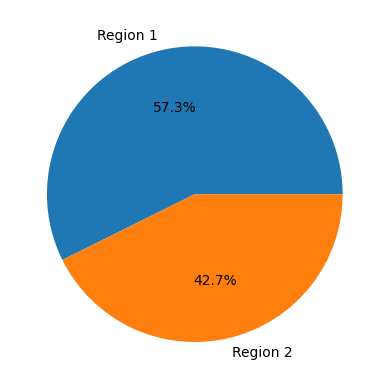

In [122]:
re.plot().pie(re.values, labels=['Region 1', 'Region 2 '], autopct='%1.1f%%')
plt.show()


### Region 1 contains stores higher than Region 2, but is that in profit too?


C:\Users\xobed\AppData\Local\Temp\ipykernel_8104\3759602999.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Sales Region').sum().reset_index()[ ['Sales Region','Profit']].plot(kind='bar' ,x='Sales Region')


<Axes: xlabel='Sales Region'>

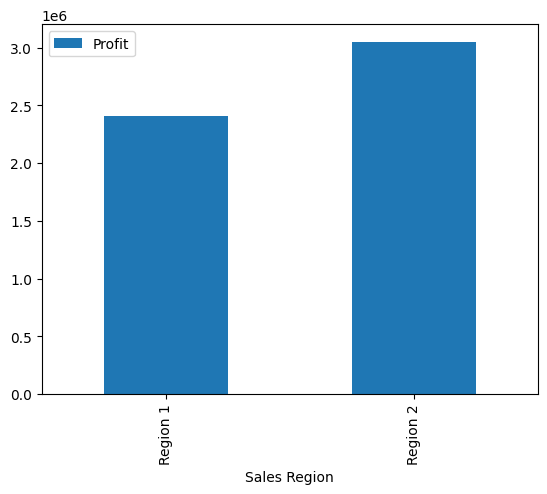

In [135]:
df.groupby('Sales Region').sum().reset_index()[
    ['Sales Region', 'Profit']].plot(kind='bar', x='Sales Region')


### NO the region 2 is highest in profit

### but Why


In [140]:
top_state

,State,Profit
0,California,1390222
1,Texas,589623
2,Florida,443549
3,Washington,278045
4,Alabama,208455
5,Illinois,186549
6,New York,151609
7,Georgia,147316
8,Connecticut,146142
9,Tennessee,142956


In [141]:
df[df['Sales Region'] == 'Region 2']['State'].value_counts()


California    40
Texas         17
Washington     7
Colorado       5
Arizona        3
Kansas         3
Utah           3
Tennessee      3
Oregon         2
New Mexico     1
Oklahoma       1
Arkansas       1
Name: State, dtype: int64

### because California and Texas in Region 2 and those are the highest states in profit


In [142]:
df.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738


# 5)New Expansion


### What is the percentage of stores in old and new Expansion?


In [145]:
exp = df['New Expansion'].value_counts()

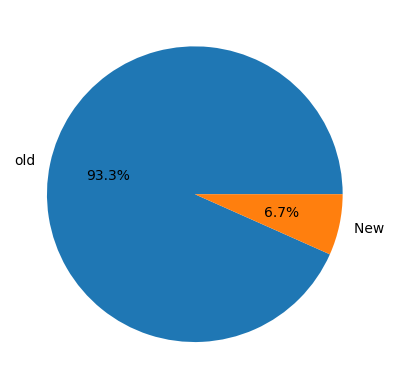

In [147]:
exp.plot().pie(re.values, labels=['old', 'New '], autopct='%1.1f%%')
plt.show()


### What is the states contain New Expansion


In [148]:
df[df['New Expansion'] == 'New']['State'].value_counts()


California    3
Illinois      2
Texas         2
Tennessee     1
Arizona       1
New Jersey    1
Name: State, dtype: int64

In [150]:
df.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738


# Marketing Spend,Revenue,Profit ,ROMS and ROMS%


In [154]:
num = df[['Marketing Spend', 'Revenue', 'Profit',	'ROMS',	'ROMS%']]


<Axes: >

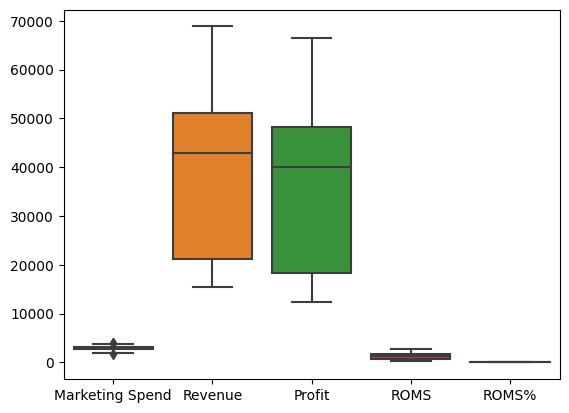

In [155]:
sns.boxplot(num)

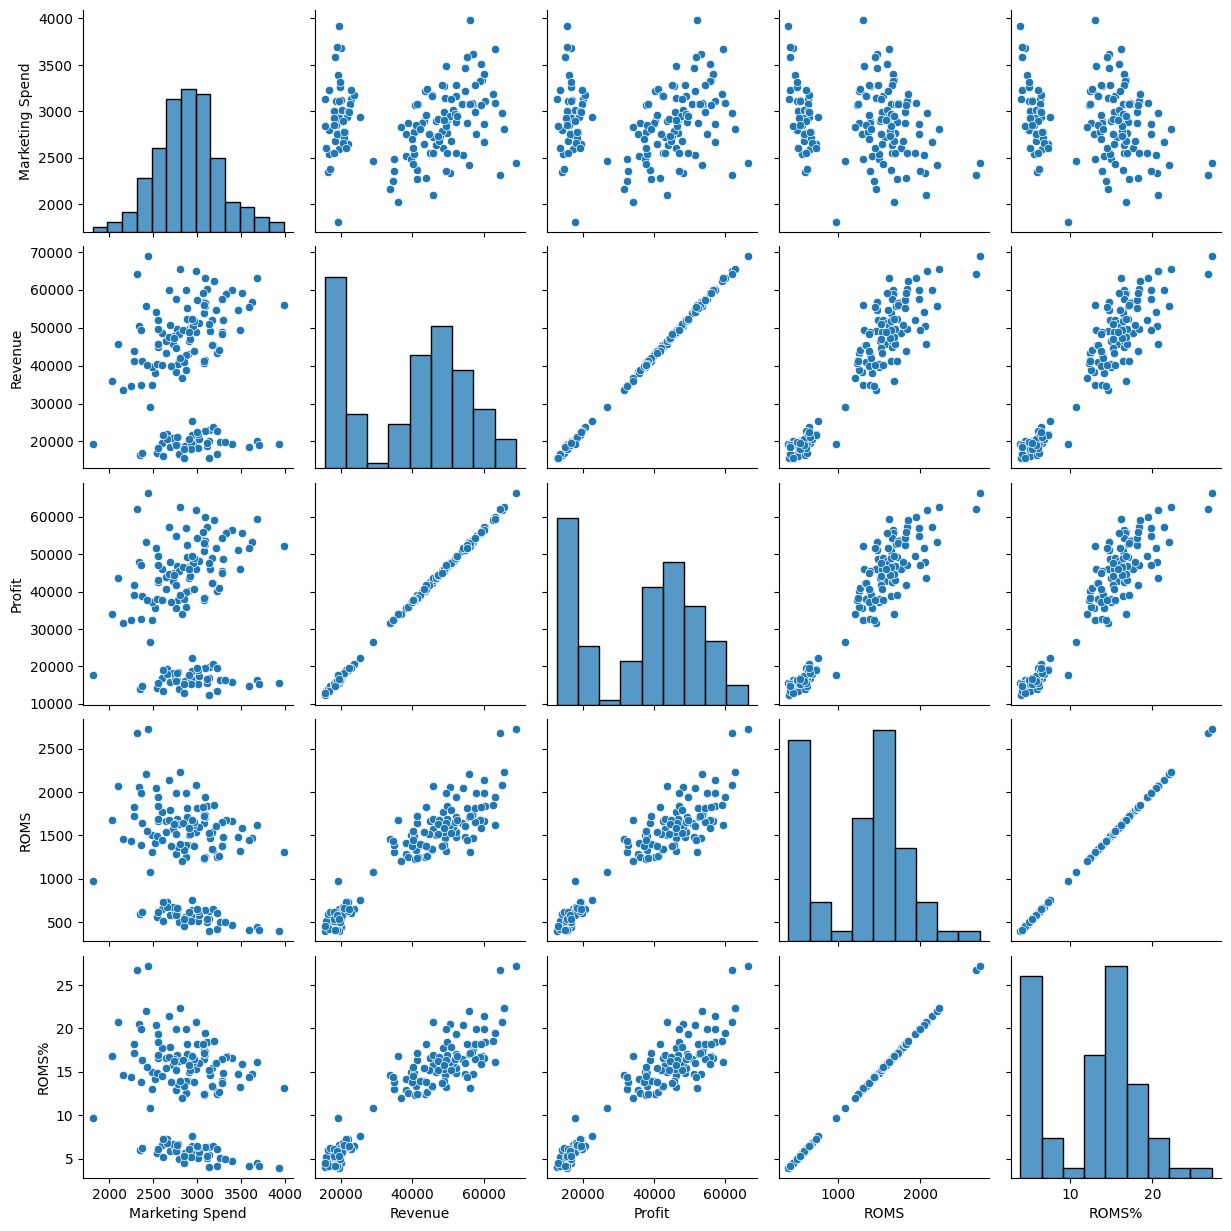

In [156]:
sns.pairplot(num)

<Axes: xlabel='Marketing Spend', ylabel='Count'>

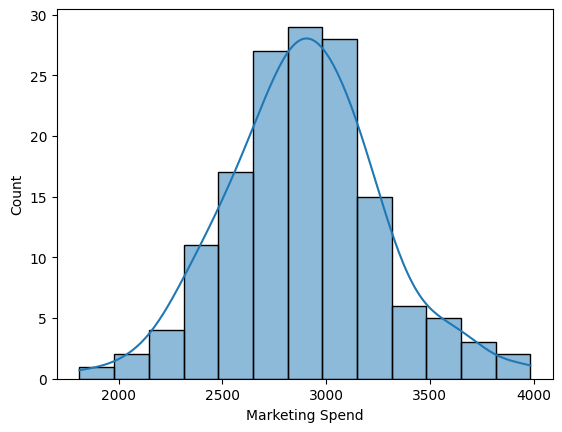

In [43]:
sns.histplot(data=df, x='Marketing Spend', kde=True)


### Marketing Spend follow normal distribution


<Axes: xlabel='Revenue', ylabel='Count'>

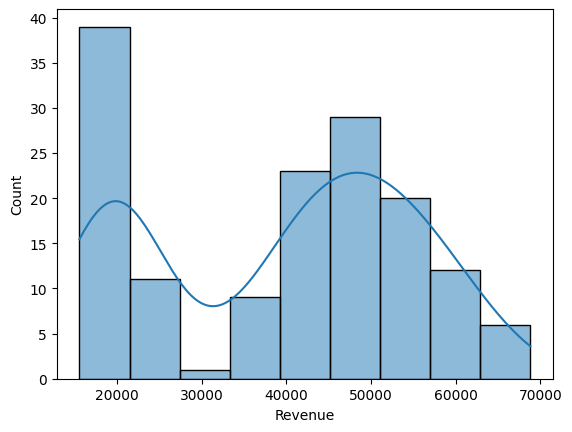

In [44]:
sns.histplot(data=df, x='Revenue', kde=True)


### The Revenue follow bimodal normal distribution


In [159]:
num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marketing Spend,150.0,2893.146667,367.862817,1811.0000,2662.2500,2898.00000,3111.500000,3984.0000
Revenue,150.0,39301.433333,15465.753977,15562.0000,21113.5000,42993.00000,51145.500000,68828.0000
Profit,150.0,36408.286667,15435.408655,12433.0000,18339.0000,40053.00000,48163.250000,66388.0000
ROMS,150.0,1274.378133,547.872035,395.6200,637.3800,1406.32500,1660.317500,2720.8200
ROMS%,150.0,12.743781,5.478720,3.9562,6.3738,14.06325,16.603175,27.2082


1. **Marketing Spend**:

   This section provides insights into the startup's marketing spending. The mean value suggests that, on average, the startup spends around $2,893.15 on marketing. The range from the minimum to maximum spending indicates variability in their marketing budgets.

2. **Revenue**:
   This section provides insights into the startup's revenue. The mean revenue is approximately $39,301.43, and the standard deviation indicates the variability in revenue. The startup's revenue seems to vary significantly, with a minimum of $15,562.00 and a maximum of $68,828.00.

3. **Profit**:

   This section provides insights into the startup's profit. The mean profit is approximately $36,408.29. Similar to revenue, profit also shows variability, with a minimum of $12,433.00 and a maximum of $66,388.00.

4. **ROMS (Return on Marketing Spend)**:

   ROMS is a metric that represents the return on marketing spend. The mean ROMS is approximately 1,274.38, indicating that, on average, the startup generates this much revenue for every unit of marketing spend. The standard deviation suggests some variability in the effectiveness of marketing campaigns.

5. **ROMS% (Return on Marketing Spend Percentage)**:

   ROMS% is the return on marketing spend expressed as a percentage. The mean ROMS% is approximately 12.74%, indicating that, on average, the startup generates a return of 12.74% on its marketing spending. The variability in this metric is also evident from the standard deviation.


In [160]:
num.corr()

,Marketing Spend,Revenue,Profit,ROMS,ROMS%
Marketing Spend,1.000000,0.094303,0.070656,-0.230445,-0.230445
Revenue,0.094303,1.000000,0.999718,0.938349,0.938349
Profit,0.070656,0.999718,1.000000,0.945686,0.945686
ROMS,-0.230445,0.938349,0.945686,1.000000,1.000000
ROMS%,-0.230445,0.938349,0.945686,1.000000,1.000000


1. **Marketing Spend**:

   Insights:

   - There is a very weak positive correlation between marketing spend and revenue (0.0943). This suggests that as marketing spending increases, revenue tends to increase slightly.
   - There is a very weak positive correlation between marketing spend and profit (0.0707). This indicates that there is only a slight positive relationship between marketing spending and profit.
   - There is a moderate negative correlation between marketing spend and ROMS (-0.2304). This suggests that as marketing spending increases, the return on marketing spend (ROMS) tends to decrease.
   - The correlation between marketing spend and ROMS% is also moderate and negative (-0.2304), indicating that as marketing spending increases, the percentage return on marketing spend (ROMS%) tends to decrease.

2. **Revenue**:

   Insights:

   - There is a very strong positive correlation between revenue and profit (0.9997). This suggests that revenue and profit are almost perfectly positively correlated, meaning when revenue increases, profit tends to increase in lockstep.
   - There is a strong positive correlation between revenue and ROMS (0.9383). This indicates that as revenue goes up, the return on marketing spend (ROMS) also tends to increase.
   - The correlation between revenue and ROMS% is strong and positive (0.9383), implying that as revenue increases, the percentage return on marketing spend (ROMS%) also tends to increase.

3. **Profit**:

   Insights:

   - There is a very strong positive correlation between profit and ROMS (0.9457). This means that as profit increases, the return on marketing spend (ROMS) tends to increase as well.
   - The correlation between profit and ROMS% is also very strong and positive (0.9457), indicating that as profit goes up, the percentage return on marketing spend (ROMS%) tends to increase.


# Final Report


1. **Location Analysis**:

   - Consider expanding into regions where the startup currently has no presence to tap into new markets.

2. **New Expansion**:

   - The "New Expansion" column indicates whether a store is part of the old or new expansion strategy. You should evaluate the performance of existing stores in the "Old" category before deciding on the expansion of new stores.
   - It's essential to understand the factors that differentiate the "Old" and "New" expansion strategies and whether they have been successful.

3. **Financial Metrics** (Marketing Spend, Revenue):

   - Consider allocating more resources to stores that are performing well in terms of revenue and optimizing marketing strategies for underperforming stores.

4. **Profitability**:

   - Prioritize locations with higher profitability for expansion.

5. **Regional Analysis**:

   - Identify trends or patterns in sales, marketing spend, and profitability by region.

6. **Expansion Decision**:

   - Consider expanding in regions where existing "Old" stores have shown strong revenue and profitability.
   - Evaluate the potential of "New" expansion stores in terms of their marketing spend and revenue compared to existing successful stores.
   - Assess the overall financial health of the startup and its capacity for expansion.

7. **Marketing Effectiveness** (ROMS and ROMS%):

   - Use ROMS and ROMS% to identify stores where marketing efforts are generating the highest returns.

8. **Market Research**:

   - Conduct thorough market research in potential new locations to understand local competition, consumer behavior, and market demand.
   - Consider factors such as population demographics and economic conditions in target regions.

9. **Risk Assessment**:

   - Assess potential risks associated with expansion, such as market saturation, competition, and economic fluctuations.
   - Develop contingency plans to mitigate risks and ensure the sustainability of the expansion strategy.

10. **Financial Planning**:
    - Create a detailed financial plan that includes budget allocation for marketing, operational expenses, and expected revenue projections for new stores.
    - Ensure that the startup has the necessary capital and resources to support the expansion.


# Thank you


In [163]:
df.to_excel('final.xlsx', index=False)

C:\Users\xobed\AppData\Local\Temp\ipykernel_8104\2566362961.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_state = df.groupby('State').sum()[['Marketing Spend',	'Revenue']].sort_values(by='Revenue' , ascending=False).reset_index().head(10)
